In [7]:
!which latex

/opt/texlive/2022/bin/x86_64-linux/latex


In [3]:
import numpy as np
import scipy as sp
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use(Path('../style.mplstyle'))

from publik.weights import utils

In [17]:
nbins = 23
q2_pts = np.linspace(0., 23, nbins+1) 
q2_pts = np.where(q2_pts < utils.kinlim(), q2_pts, utils.kinlim())
par, sam = utils.sampledBR(q2_pts, N_sample = 20000)

INFO:EOS:Creating analysis with 8 priors, 2 EOS-wide constraints, 0 global options, 0 manually-entered constraints and 0 fixed parameters.
INFO:EOS:Optimization goal achieved after 163 function evaluations


Pre-runs:   0%|          | 0/3 [00:00<?, ?it/s]

INFO:EOS:Prerun 0 out of 3
INFO:EOS:Prerun 0: acceptance rate is   2%
INFO:EOS:Prerun 1 out of 3
INFO:EOS:Prerun 1: acceptance rate is   1%
INFO:EOS:Prerun 2 out of 3
INFO:EOS:Prerun 2: acceptance rate is   3%
INFO:EOS:Main run: started ...


Main run:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:EOS:Main run: acceptance rate is  15%


INFO:matplotlib.texmanager:No LaTeX-compatible font found for the sans-serif fontfamily in rcParams. Using default.
INFO:matplotlib.texmanager:No LaTeX-compatible font found for the sans-serif fontfamily in rcParams. Using default.
INFO:matplotlib.texmanager:No LaTeX-compatible font found for the sans-serif fontfamily in rcParams. Using default.
INFO:matplotlib.texmanager:No LaTeX-compatible font found for the sans-serif fontfamily in rcParams. Using default.
INFO:matplotlib.texmanager:No LaTeX-compatible font found for the sans-serif fontfamily in rcParams. Using default.
INFO:matplotlib.texmanager:No LaTeX-compatible font found for the sans-serif fontfamily in rcParams. Using default.
INFO:matplotlib.texmanager:No LaTeX-compatible font found for the sans-serif fontfamily in rcParams. Using default.
INFO:matplotlib.texmanager:No LaTeX-compatible font found for the sans-serif fontfamily in rcParams. Using default.
INFO:matplotlib.texmanager:No LaTeX-compatible font found for the sans-s

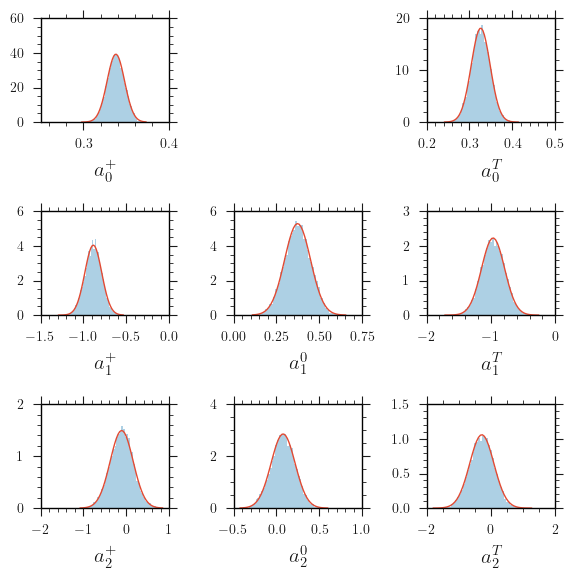

In [21]:
ffpars = [r'$a^+_0$', r'$a^+_1$', r'$a^+_2$', r'$a^0_1$', r'$a^0_2$', r'$a^T_0$', r'$a^T_1$', r'$a^T_2$']

fig, ax = plt.subplots(3,3, figsize=(3*2,3*2))

ax = ax.T.ravel()
iplot = 0
for iparam in range(len(par[0])):
    if iplot==3: 
        ax[iplot].axis('off')
        iplot+=1
    myplt = ax[iplot].hist(par[:,iparam], bins=50, density=True, alpha=0.4)
    ax[iplot].plot(myplt[1], sp.stats.norm.pdf(myplt[1],np.mean(par, axis=0)[iparam],np.std(par, axis=0)[iparam]), linewidth=1)
    # lab = analysis_argsK['priors'][iparam]['parameter'].replace('@BSZ2015', '')
    # lab = lab.replace('B->K::alpha^', '')
    ax[iplot].tick_params(axis='both', which='major', labelsize=10)
    ax[iplot].set_xlabel(ffpars[iparam], fontsize=15)
    iplot +=1

plt.tight_layout()
plt.savefig('../results/figs/hadr_params.pdf')
plt.show()